In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv('data challenge.csv')
data.fillna(value=0, inplace=True)
data.head()

,ad_network_code,format,type,country,platform,pstday,revenue,clicks,impressions
0,0b0c3dd442e2cf1688d58b1741ce01f182c38bce,static fsi,non-rewarded,Rest of the World,ios,2016-05-10 00:00:00.000000,0.00,45,377.0
1,7a8e69eeedaf9c92d2fff1bbea90147d65a054da,premium interstitial,non-rewarded,Rest of the World,ios,2016-05-24 00:00:00.000000,23.83,682,3629.0
2,7a8e69eeedaf9c92d2fff1bbea90147d65a054da,premium interstitial,non-rewarded,Italy,ios,2016-05-24 00:00:00.000000,12.80,219,1715.0
3,7a8e69eeedaf9c92d2fff1bbea90147d65a054da,premium interstitial,non-rewarded,Rest of the World,android,2016-05-24 00:00:00.000000,3.13,28,774.0
4,0b0c3dd442e2cf1688d58b1741ce01f182c38bce,static fsi,non-rewarded,Rest of the World,android,2016-05-11 00:00:00.000000,0.56,74,616.0


In [18]:
print(data[data.platform == 'ios'].impressions.mean())
print(data[data.platform == 'ios'].clicks.mean())
print('ios revenue mean ' + str(data[data.platform == 'ios'].revenue.mean()))
print(data[data.platform == 'android'].impressions.mean())
print(data[data.platform == 'android'].clicks.mean())
print('android revenue mean ' + str(data[data.platform == 'android'].revenue.mean()))

759.036332435325
92.62416503671993
ios revenue mean 5.572349351709042
1416.5352813698173
104.69617298945012
android revenue mean 4.490774975258034


    This is ad performance data. It shows ads by format, type, platform, and the impressions, clicks, and revenue generated by that ad. Comparing platforms, Android has nearly double the impressions of iOS. However, mean revenue for Android is lower. The purpose of this experimentation RFC will be to raise Android revenue. 

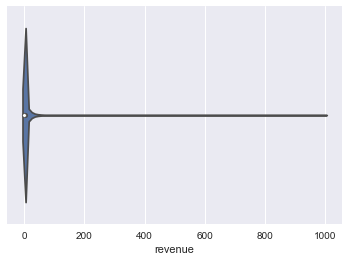

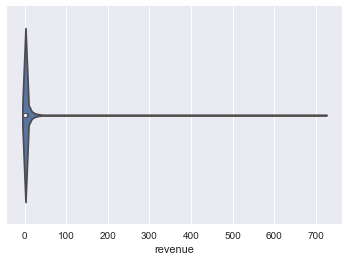

In [4]:
sns.violinplot(data[data.platform == 'ios'].revenue)
plt.show()
sns.violinplot(data[data.platform == 'android'].revenue)
plt.show()

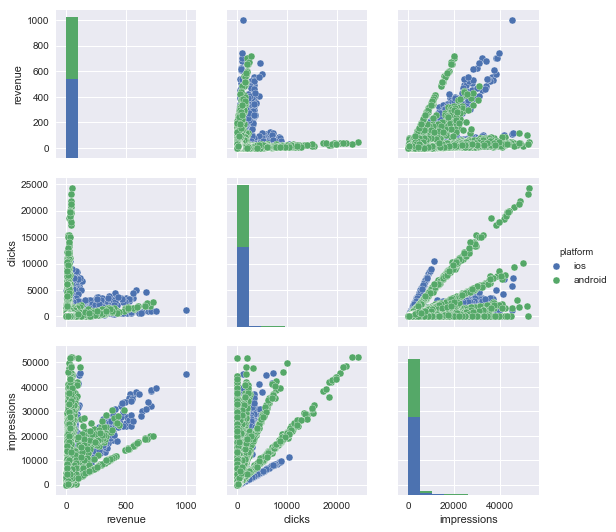

In [22]:
sns.pairplot(data[data['platform'] == 'ios'])
plt.show()

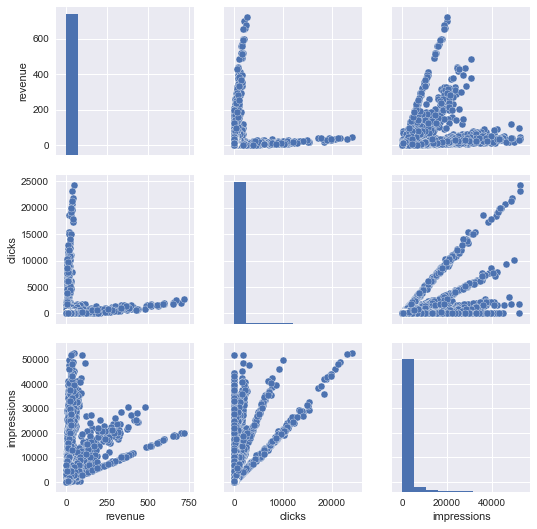

In [6]:
sns.pairplot(data[data['platform'] == 'android'])
plt.show()

In [7]:
data.groupby('platform').get_group('ios').format.value_counts()

video fsi               19556
static/video fsi         8666
premium interstitial     5626
static fsi               5533
mid-level 7              3867
rich media               3079
line item                 440
Name: format, dtype: int64

In [8]:
data.groupby('platform').get_group('android').format.value_counts()

video fsi               16134
static/video fsi         8001
premium interstitial     5401
mid-level 7              3326
static fsi               3281
rich media               1387
offerwall                   2
Name: format, dtype: int64

    A look at the differences between ad formats for the two platforms. Note that iOS contains line item ads, while Android has offerwall ads. 

In [9]:
print('static fsi ' + str(data[data.format == 'static fsi'].impressions.mean()))
print(data[data.format == 'static fsi'].clicks.mean())
print(data[data.format == 'static fsi'].revenue.mean())
print('static/video fsi ' + str(data[data.format == 'static/video fsi'].impressions.mean()))
print(data[data.format == 'static/video fsi'].clicks.mean())
print(data[data.format == 'static/video fsi'].revenue.mean())
print('premium interstitial ' + str(data[data.format == 'premium interstitial'].impressions.mean()))
print(data[data.format == 'premium interstitial'].clicks.mean())
print(data[data.format == 'premium interstitial'].revenue.mean())
print('video fsi ' + str(data[data.format == 'video fsi'].impressions.mean()))
print(data[data.format == 'video fsi'].clicks.mean())
print(data[data.format == 'video fsi'].revenue.mean())
print('mid-level 7 ' + str(data[data.format == 'mid-level 7'].impressions.mean()))
print(data[data.format == 'mid-level 7'].clicks.mean())
print(data[data.format == 'mid-level 7'].revenue.mean())
print('rich media ' + str(data[data.format == 'rich media'].impressions.mean()))
print(data[data.format == 'rich media'].clicks.mean())
print(data[data.format == 'rich media'].revenue.mean())
print('offerwall ' + str(data[data.format == 'offerwall'].impressions.mean()))
print('clicks ' + str(data[data.format == 'offerwall'].clicks.mean()))
print(data[data.format == 'offerwall'].revenue.mean())
print('line item ' + str(data[data.format == 'line item'].impressions.mean()))
print(data[data.format == 'line item'].clicks.mean())
print(data[data.format == 'line item'].revenue.mean())

static fsi 280.69174041297936
17.16394372589063
0.32474245518493455
static/video fsi 1170.265014699706
19.82402351952961
3.3496428349588148
premium interstitial 1534.9688945316043
89.09902965448445
8.072272611059798
video fsi 1081.7640235360045
165.72793499579714
5.881177650912922
mid-level 7 370.4576671764215
16.78590296121229
1.4725677742249579
rich media 130.76489028213166
5.431930138826691
0.23829825347066386
offerwall 24.0
clicks 0.0
0.0
line item 527.0431818181818
0.0
8.202250000000006


In [26]:
print(data[data.type == 'rewarded'].impressions.mean())
print(data[data.type == 'rewarded'].clicks.mean())
print(data[data.type == 'rewarded'].revenue.mean())
print(data[data.type == 'non-rewarded'].impressions.mean())
print(data[data.type == 'non-rewarded'].clicks.mean())
print(data[data.type == 'non-rewarded'].revenue.mean())

1429.5932304748235
116.50847912258219
7.272248789779598
843.2034650698603
87.93092325871044
3.9817853194161716


    Offerwall ads have generated no revenue, while line item ads generate ~8.2. I hypothesize that replacing the offerwall ads on Android with line item ads will increase revenue, assuming that switching the ad types is not cost prohibitive. Additionally, as many ads as possible should be rewarded ads, which have higher revenue. 

    To rollout the experiment, we would want to run line item ads on the Android platform for two weeks. Randomize who sees which ad formats to ensure representative samples. The control group will be exposed to the current offerwall ads, and the experimental group will see line item ads. After the two weeks, measure the revenue generated by the two groups. Compare the mean revenue of both groups using a t test. Divide the difference in the means of the groups by the square root of the sum of the ratio of the standard deviation and sample size for the groups. If cost allows, try to run the experiment every month / season for a year to eliminate seasonality.

    If the Android revenue increases to the level of iOS revenue, then the experiment will be deemed successful. For further analysis, perhaps we can experiment with optimizing the distribution of ad types, fine tuning the ratio of rewarded to non-rewarded ads, or even attempt to optimize some countries ad formats. 